In [1]:
import pandas as pd
import numpy as np
import regex as re

In [2]:
Data = pd.read_csv("D:\Data sets\Project Python\laptop_price.csv", encoding='latin1')
Data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [3]:
Data.drop('laptop_ID' , axis = 1 , inplace = True)

In [4]:
df = Data.copy()

In [5]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [7]:
df=df.drop_duplicates()

In [8]:
df['resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')

In [9]:
df['screentype'] = df['ScreenResolution'].replace(r'(\d+x\d+)','',regex=True)

In [10]:
df['screentype'] = df['screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','',regex=True)

In [11]:
df['touchscreen'] = df['screentype'].str.extract(r'(Touchscreen)')
df['screentype'] = df['screentype'].replace(r'(Touchscreen)','',regex=True)

In [12]:
df['touchscreen'] = df['touchscreen'].replace('Touchscreen',1)
df['touchscreen'] = df['touchscreen'].replace(np.nan,0)

In [13]:
df['screentype']=df['screentype'].replace(r' ','',regex=True)
df['screentype'].value_counts()

screentype
                         918
IPSPanel                 340
IPSPanelRetinaDisplay     17
Name: count, dtype: int64

In [14]:
df['screentype'] = df['screentype'].replace(r'^\s*$', np.nan, regex=True)
df['screentype'].value_counts()

screentype
IPSPanel                 340
IPSPanelRetinaDisplay     17
Name: count, dtype: int64

In [15]:
df = df.drop('ScreenResolution' , axis = 1 )

In [16]:
df

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1920x1080,IPSPanel,1.0
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,3200x1800,IPSPanel,1.0
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,1366x768,NaN,0.0
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1366x768,NaN,0.0


In [17]:
df['cpu_freq'] = df['Cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 

In [18]:
df['cpu_freq'] = df['cpu_freq'].str.replace('GHz', '')
df.rename(columns={'cpu_freq': 'cpu_freq(GHz)'}, inplace=True)

In [19]:
df['Cpu']= df['Cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)

In [20]:
df['cpu_freq(GHz)'] = df['cpu_freq(GHz)'].astype(float)

In [21]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,resolution,screentype,touchscreen,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1


In [22]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df.rename(columns={'Ram': 'Ram(GB)'}, inplace=True)
df['Ram(GB)'] = df['Ram(GB)'].astype(int)

In [23]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight,Price_euros,resolution,screentype,touchscreen,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1


In [24]:
df['memory_1']=df['Memory']
df['memory_1']=df['memory_1'].str.replace('1.0TB','1TB', regex=True)
df['memory_1']=df['memory_1'].str.replace('1TB','1000GB')
df['memory_1']=df['memory_1'].str.replace('2TB','2000GB')
df['memory_1']=df['memory_1'].str.replace('GB','')

In [25]:
df['memory2']=df['memory_1'].str.replace(r' ','')

In [26]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight,Price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1,memory2
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128 SSD,128SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8,128 Flash Storage,128FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5,256 SSD,256SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512 SSD,512SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256 SSD,256SSD


In [27]:
memory_1=[]
memory_2=[]
for i in df['memory2']:
    if len(re.findall(r'\+',i))==1: # DOUBLE DRIVE
        one=re.findall(r'(\w+)',i)
        memory_1.append(one[0])
        memory_2.append(one[1])
    else: # SINGLE DRIVE
        one=re.findall(r'(\w+)',i)
        memory_1.append(one[0])
        memory_2.append('NaN')

In [28]:
memory_1_gb=[]
memory_1_type=[]
for i in memory_1:
    memory_1_type.append(re.findall(r'(\D\w+)',i)[0])
    memory_1_gb.append(re.findall(r'(\d+)',i)[0])

In [29]:
memory_2_gb=[]
memory_2_type=[]
for i in memory_2:
    if i != 'NaN':
        memory_2_type.append(re.findall(r'(\D\w+)',i)[0])
        memory_2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        memory_2_type.append('NaN')
        memory_2_gb.append(0)

In [30]:
df['memory_1_sto(GB)'] = memory_1_gb
df['memory_1_type'] = memory_1_type
df['memory_2_sto(GB)'] = memory_2_gb
df['memory_2_type'] = memory_2_type

In [31]:
df['memory_1_sto(GB)'] = df['memory_1_sto(GB)'].astype(float)
df['memory_2_sto(GB)'] = df['memory_2_sto(GB)'].astype(float)

In [32]:
df=df.drop(['memory_1','memory2','Memory'], axis=1)
df = df.replace({'NaN': np.nan})
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram(GB),Gpu,OpSys,Weight,Price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN


In [33]:
df['Weight'] = df['Weight'].str.replace('kg','').astype(float)
df.rename(columns={'Weight': 'Weight(kg)'}, inplace=True)
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram(GB),Gpu,OpSys,Weight(kg),Price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN


In [34]:
df['cpu_brand'] = df['Cpu'].str.extract(r'^(\w+)')
df['cpu_brand'].value_counts()

cpu_brand
Intel      1214
AMD          60
Samsung       1
Name: count, dtype: int64

In [35]:
df['gpu_brand'] = df['Gpu'].str.extract(r'^(\w+)')
df['gpu_brand'].value_counts()

gpu_brand
Intel     704
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [36]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram(GB),Gpu,OpSys,Weight(kg),Price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN,Intel,Intel


In [65]:
df['price'] = df['Price_euros'] * 87.70

In [67]:
df.drop('Price_euros' , axis = 1 , inplace = True)

In [68]:
df.to_csv('laptop-clean.csv', index=False)

In [69]:
df_clean = pd.read_csv("D:\Data sets\Project Python\laptop-clean.csv")

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

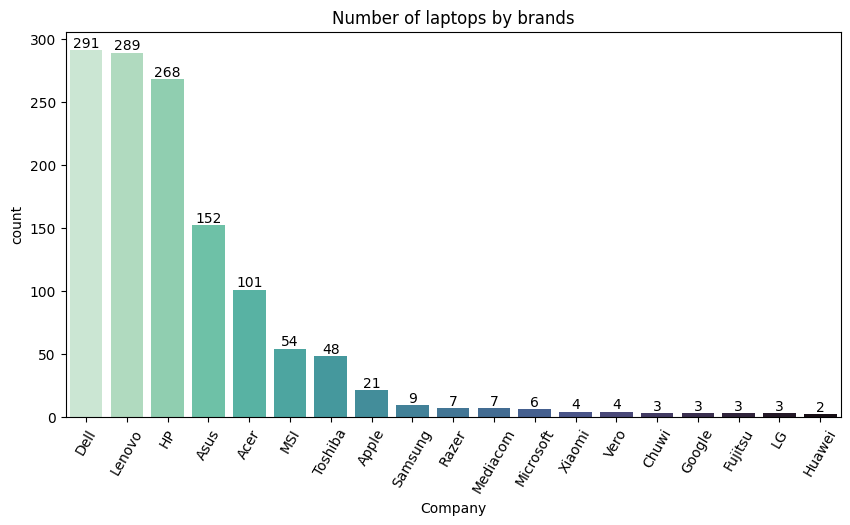

In [46]:
#Which brand is the most frequent in the dataframe?

fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='Company', data=df, palette='mako_r', order = df['Company'].value_counts().index )
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by brands')
plt.show()

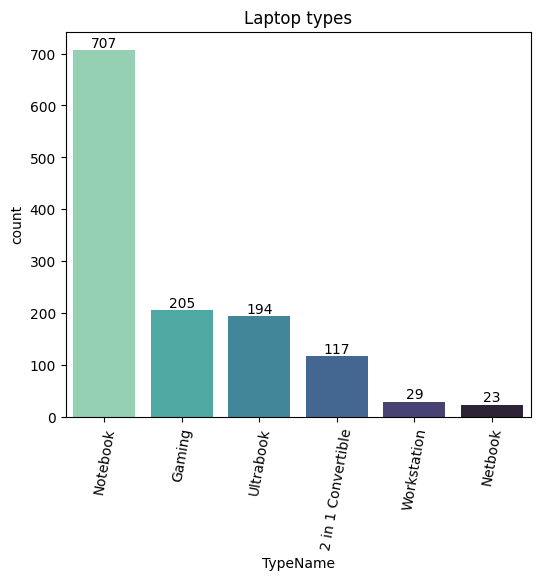

In [48]:
#What type of laptop is the most frequent?

fig, ax  = plt.subplots(figsize=(6,5))
ax=sns.countplot(x='TypeName', data=df,palette='mako_r', order = df['TypeName'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop types')
plt.show()

In [52]:
print('Most laptops are notebooks, which make {:.2f}% of the total laptops'.format(len(df[df['TypeName']=='Notebook'])*100/len(df)))

Most laptops are notebooks, which make 55.45% of the total laptops


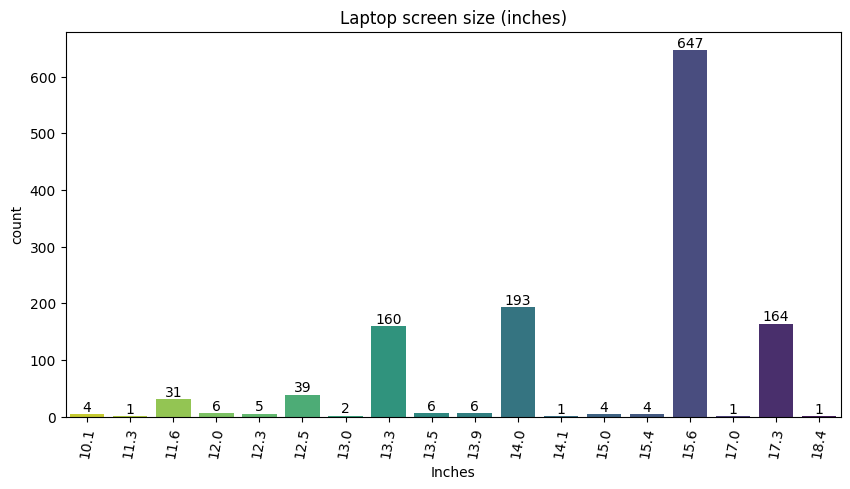

In [49]:
#Which size is the most popular?

fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='Inches', data=df, palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

In [54]:
print('Most laptops have 15.6 inches, which make {:.2f}% of the total laptops'.format(len(df[df['Inches']==15.6])*100/len(df)))

Most laptops have 15.6 inches, which make 50.75% of the total laptops


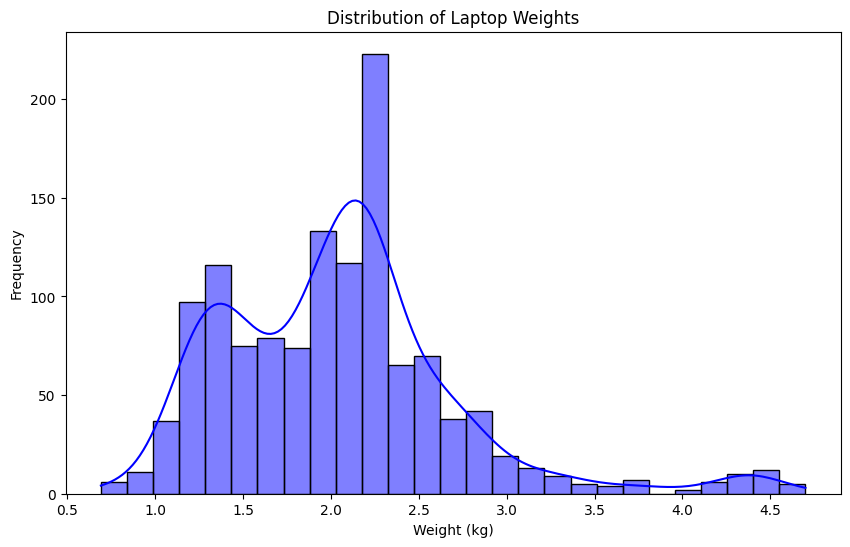

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))


sns.histplot(df['Weight(kg)'], kde=True,color='#0000FF', ax=ax )

plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.title('Distribution of Laptop Weights')

plt.show()

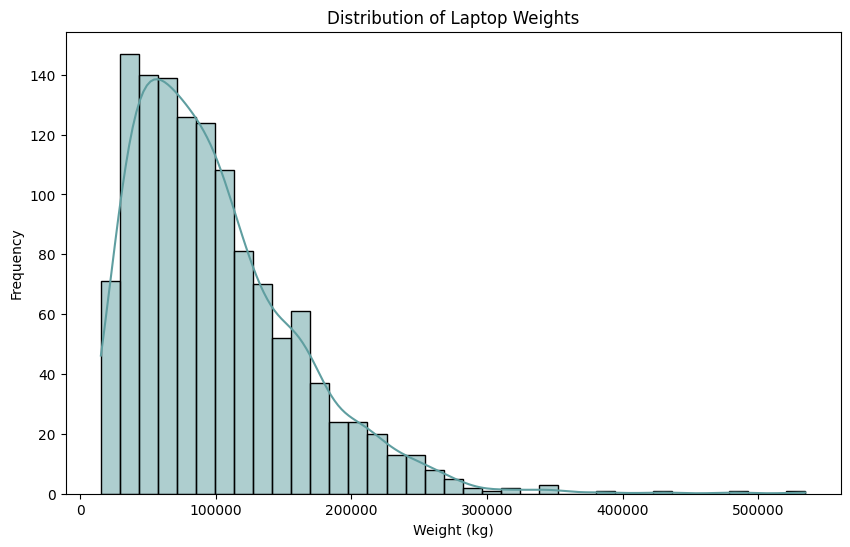

In [83]:
fig, ax = plt.subplots(figsize=(10, 6))


sns.histplot(df['price'], kde=True,color='cadetblue', ax=ax )

plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.title('Distribution of Laptop Weights')

plt.show()

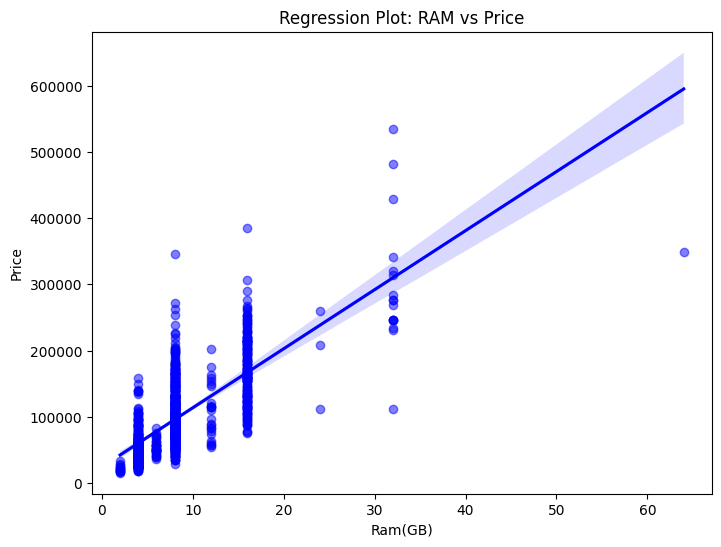

In [84]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Ram(GB)', y='price', data=df, scatter_kws={'alpha':0.5}, color='blue')

plt.xlabel('Ram(GB)')
plt.ylabel('Price')
plt.title('Regression Plot: RAM vs Price')

plt.show()

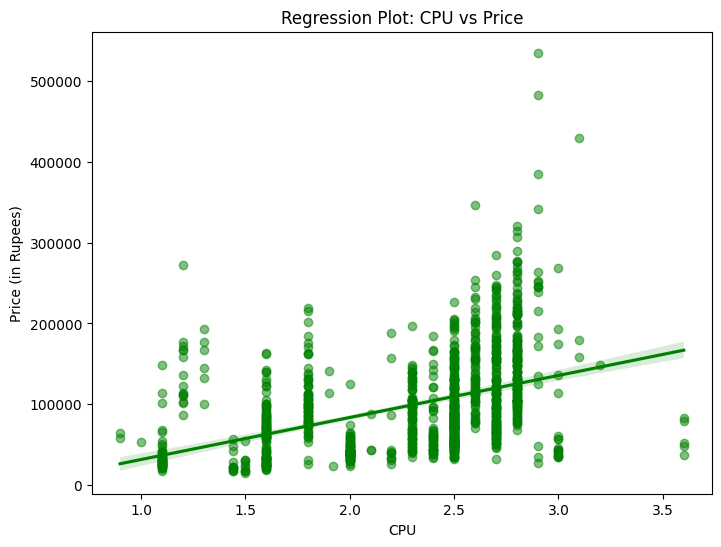

In [90]:
plt.figure(figsize=(8, 6))
sns.regplot(x='cpu_freq(GHz)', y='price', data=df, scatter_kws={'alpha':0.5}, color='green')

# Set labels and title
plt.xlabel('CPU')
plt.ylabel('Price (in Rupees)')
plt.title('Regression Plot: CPU vs Price')

# Show the plot
plt.show()

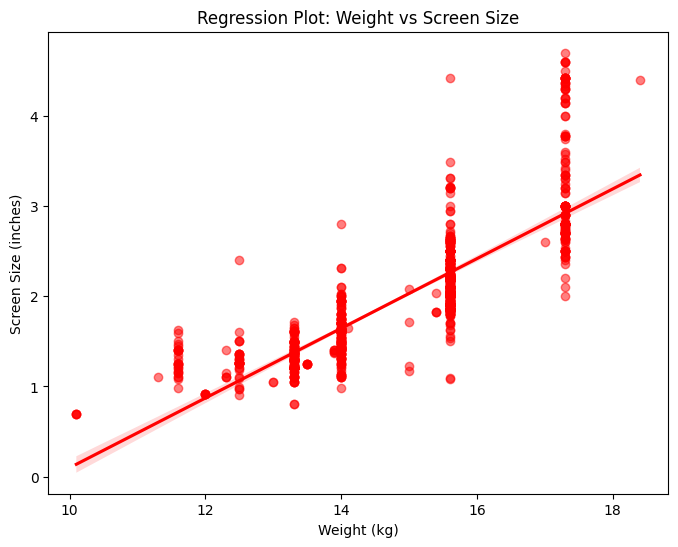

In [92]:
plt.figure(figsize=(8, 6))
sns.regplot(y='Weight(kg)', x='Inches', data=df, scatter_kws={'alpha':0.5}, color='red')

# Set labels and title
plt.xlabel('Weight (kg)')
plt.ylabel('Screen Size (inches)')
plt.title('Regression Plot: Weight vs Screen Size')

# Show the plot
plt.show()

As expected, PCs with bigger screens are heavier. In particular, on average, for every additional inch the pc is 400g heavier.

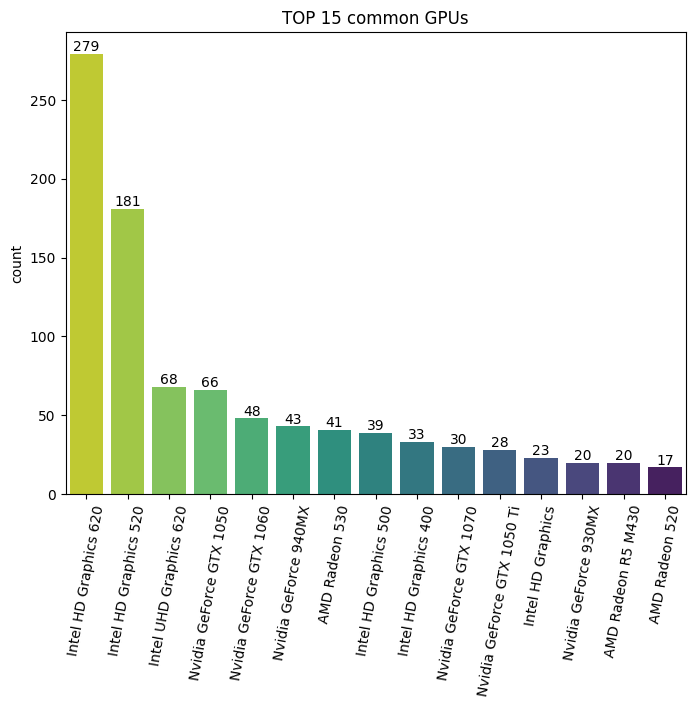

In [96]:
gpu_list = df_clean['Gpu'].value_counts()[:15].index.tolist()

plt.figure(figsize=(8,6))
ax=sns.countplot(x='Gpu', data=df_clean[df_clean['Gpu'].isin(gpu_list)], order = gpu_list, palette='viridis_r')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common GPUs')
plt.xlabel('')
plt.show()

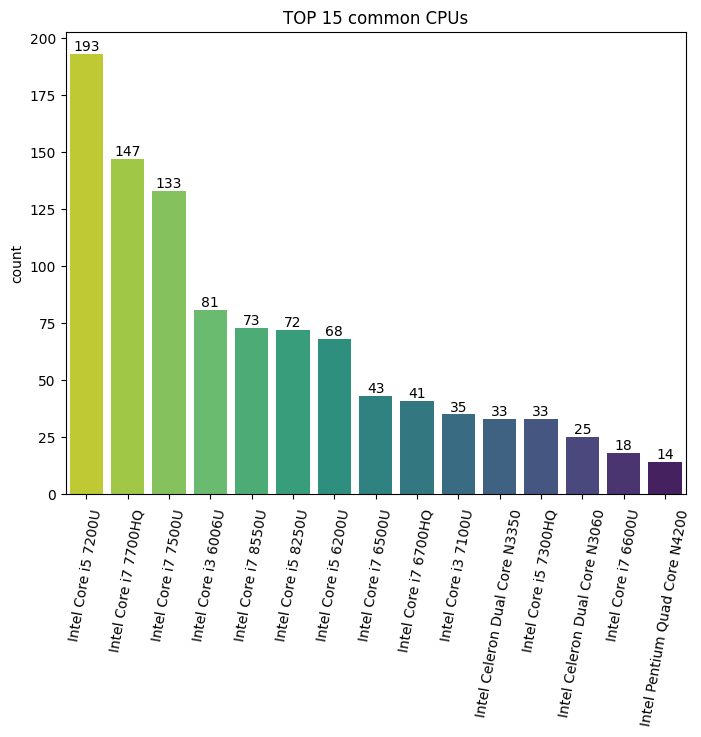

In [97]:
cpu_list = df_clean['Cpu'].value_counts()[:15].index.tolist()

plt.figure(figsize=(8,6))
ax=sns.countplot(x='Cpu', data=df_clean[df_clean['Cpu'].isin(cpu_list)], order = cpu_list, palette='viridis_r')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common CPUs')
plt.xlabel('')
plt.show()

In [99]:
df['Company'].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [101]:
company_list = df['Company'].value_counts().index[:8].tolist()
company_list

['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple']

C:\Users\abhid\AppData\Local\Temp\ipykernel_136\1241684904.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x='Company', y='price', data=df[df['Company'].isin(company_list)],


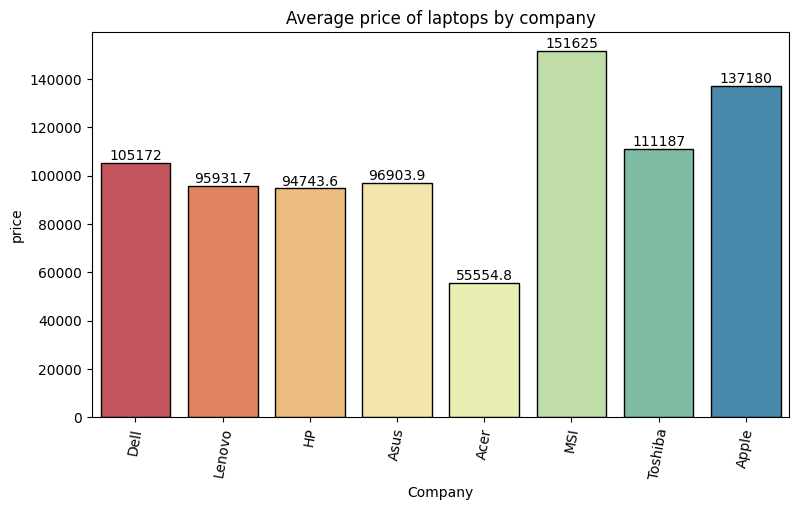

In [103]:
plt.figure(figsize=(9,5))
ax=sns.barplot(x='Company', y='price', data=df[df['Company'].isin(company_list)],
                order=company_list, 
                palette='Spectral', 
                ci=False,
                edgecolor="black")
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Average price of laptops by company')
plt.show()